In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import glob
import sys
sys.path.insert(1, '/export03/data/opt/hippunfold_toolbox/hippunfold_toolbox')
import plotting
import utils

In [2]:
micapipe_dir = '../sourcedata/Micapipe_MICs'
hippunfold_dir = '../hippunfold/MICs_v1.3.0/hippunfold'
tmp_dir = 'tmp_MICs-struct'

subs = ['HC048', 'HC043', 'HC087', 'HC037', 'HC055', 'HC100', 'HC036', 'HC017', 'HC088', 'HC040', 'HC058', 'HC076', 'HC090', 'HC059', 'HC101', 'HC063', 'HC094', 'HC024', 'HC050',
 'HC080', 'HC013', 'HC026', 'HC001', 'HC084', 'HC105', 'HC083', 'HC042', 'HC014', 'HC033', 'HC081', 'HC106', 'HC108', 'HC095', 'HC002', 'HC102', 'HC028', 'HC020', 'HC049',
 'HC007', 'HC023', 'HC065', 'HC025', 'HC056', 'HC003', 'HC015', 'HC077', 'HC067', 'HC072', 'HC109', 'HC086', 'HC089', 'HC091', 'HC031', 'HC039', 'HC112', 'HC068', 'HC034',
 'HC032', 'HC060', 'HC047', 'HC103', 'HC046', 'HC009', 'HC097', 'HC116', 'HC053', 'HC079', 'HC029', 'HC075', 'HC078', 'HC057', 'HC018', 'HC074', 'HC064',
 'HC096', 'HC010', 'HC038', 'HC093', 'HC082', 'HC092', 'HC027', 'HC019', 'HC005', 'HC008', 'HC011', 'HC044', 'HC030', 'HC035', 'HC085', 'HC069', 'HC041', 'HC012', 'HC054', 'HC022', 'HC016', 'HC099',
 'HC073', 'HC052', 'HC045']
ses = 'ses-01'

hemis = ['L','R']
labels = ['hipp']#,'dentate'] 
ind = [range(7262), range(7262,7262+1788)]

In [21]:
import pandas
data=pandas.read_csv('/data/mica3/BIDS_MICs/rawdata/participants_old.tsv',sep='\t')
subs2 = ['sub-' + s for s in subs]
data[data['participant_id'].isin(subs2)]

,participant_id,Nfiles,date,group,dob,age,sex,dicoms
0,sub-HC001,12.0,NaN,NaN,NaN,NaN,NaN,/host/fladgate/local_raid/prismaScans/MICA-MTL...
1,sub-HC002,12.0,10-04-2018,control,06-01-1993,25.0,M,/host/fladgate/local_raid/prismaScans/MICA-MTL...
2,sub-HC003,14.0,17-04-2018,control,23-02-1996,22.0,F,/host/fladgate/local_raid/prismaScans/MICA-MTL...
4,sub-HC005,13.0,30-04-2018,control,24-09-1994,24.0,M,/host/fladgate/local_raid/prismaScans/MICA-MTL...
6,sub-HC007,13.0,04-05-2018,control,22-09-1976,42.0,M,/host/fladgate/local_raid/prismaScans/MICA-MTL...
7,sub-HC008,13.0,08-05-2018,control,08-11-1988,30.0,M,/host/fladgate/local_raid/prismaScans/MICA-MTL...
8,sub-HC009,13.0,15-05-2018,control,17-09-1987,31.0,F,/host/fladgate/local_raid/prismaScans/MICA-MTL...
9,sub-HC010,13.0,29-05-2018,control,23-12-1981,36.0,M,/host/fladgate/local_raid/prismaScans/MICA-MTL...
10,sub-HC011,13.0,30-05-2018,control,15-04-1992,26.0,F,/host/fladgate/local_raid/prismaScans/MICA-MTL...
11,sub-HC012,13.0,24-07-2018,control,29-06-1991,27.0,F,/host/fladgate/local_raid/prismaScans/MICA-MTL...


In [3]:
#%%capture
features = ['DTI-FA', 'DTI-ADC', 'qT1']
file_ext = ['model-DTI_map-FA', 'model-DTI_map-ADC', 'map-T1map']
for s,sub in enumerate(subs):
    #if not glob.glob(f'{hippunfold_dir}/sub-{sub}/ses-*/surf/sub-{sub}_ses-*_hemi-{hemis[-1]}_space-T1w_den-0p5mm_label-{labels[-1]}_{features[-1]}.shape.gii'):
    try:
        for h,hemi in enumerate(hemis):
            for l,label in enumerate(labels):
                for f,feature in enumerate(features):
                    # sample
                    cmd4 = f'wb_command -volume-to-surface-mapping '\
                        f'{micapipe_dir}/sub-{sub}/{ses}/maps/sub-{sub}_{ses}_space-nativepro_{file_ext[f]}.nii.gz '\
                        f'{hippunfold_dir}/sub-{sub}/{ses}/surf/sub-{sub}_{ses}_hemi-{hemi}_space-T1w_den-0p5mm_label-{label}_midthickness.surf.gii '\
                        f'{hippunfold_dir}/sub-{sub}/{ses}/surf/sub-{sub}_{ses}_hemi-{hemi}_space-T1w_den-0p5mm_label-{label}_{feature}.shape.gii '\
                        f'-enclosing'
                    !{cmd4}
    except:
        print(f'{sub} no {feature}')



While running:
/data/mica1/01_programs/workbench-1.4.2/bin_linux64/../exe_linux64/wb_command -volume-to-surface-mapping ../sourcedata/Micapipe_MICs/sub-HC040/ses-01/maps/sub-HC040_ses-01_space-nativepro_model-DTI_map-FA.nii.gz ../hippunfold/MICs_v1.3.0/hippunfold/sub-HC040/ses-01/surf/sub-HC040_ses-01_hemi-L_space-T1w_den-0p5mm_label-hipp_midthickness.surf.gii ../hippunfold/MICs_v1.3.0/hippunfold/sub-HC040/ses-01/surf/sub-HC040_ses-01_hemi-L_space-T1w_den-0p5mm_label-hipp_DTI-FA.shape.gii -enclosing

ERROR: NAME OF FILE: sub-HC040_ses-01_space-nativepro_model-DTI_map-FA.nii.gz
PATH TO FILE: ../sourcedata/Micapipe_MICs/sub-HC040/ses-01/maps

File does not exist.


While running:
/data/mica1/01_programs/workbench-1.4.2/bin_linux64/../exe_linux64/wb_command -volume-to-surface-mapping ../sourcedata/Micapipe_MICs/sub-HC040/ses-01/maps/sub-HC040_ses-01_space-nativepro_model-DTI_map-ADC.nii.gz ../hippunfold/MICs_v1.3.0/hippunfold/sub-HC040/ses-01/surf/sub-HC040_ses-01_hemi-L_space-T1w_den-0p

In [4]:
hipp_dat = np.ones([7262+1788,2,len(subs),len(features)])*np.nan
missingdat = np.zeros((3,2,2))

for f,feature in enumerate(features):
    for s,sub in enumerate(subs):
        for h,hemi in enumerate(hemis):
            for l,label in enumerate(labels):
                try:
                    d = nib.load(f'{hippunfold_dir}/sub-{sub}/{ses}/surf/'\
                                 f'sub-{sub}_{ses}_hemi-{hemi}_space-T1w'\
                                 f'_den-0p5mm_label-{label}_{feature}.shape.gii')
                    hipp_dat[ind[l],h,s,f] = d.darrays[0].data
                except:
                    missingdat[f,h,l] += 1

In [9]:
missingdat[:,0,0]

array([17., 17., 10.])

/export03/data/opt/venv/lib/python3.8/site-packages/brainspace/plotting/base.py:287: UserWarning: Interactive mode requires 'panel'. Setting 'interactive=False'
  warnings.warn("Interactive mode requires 'panel'. "


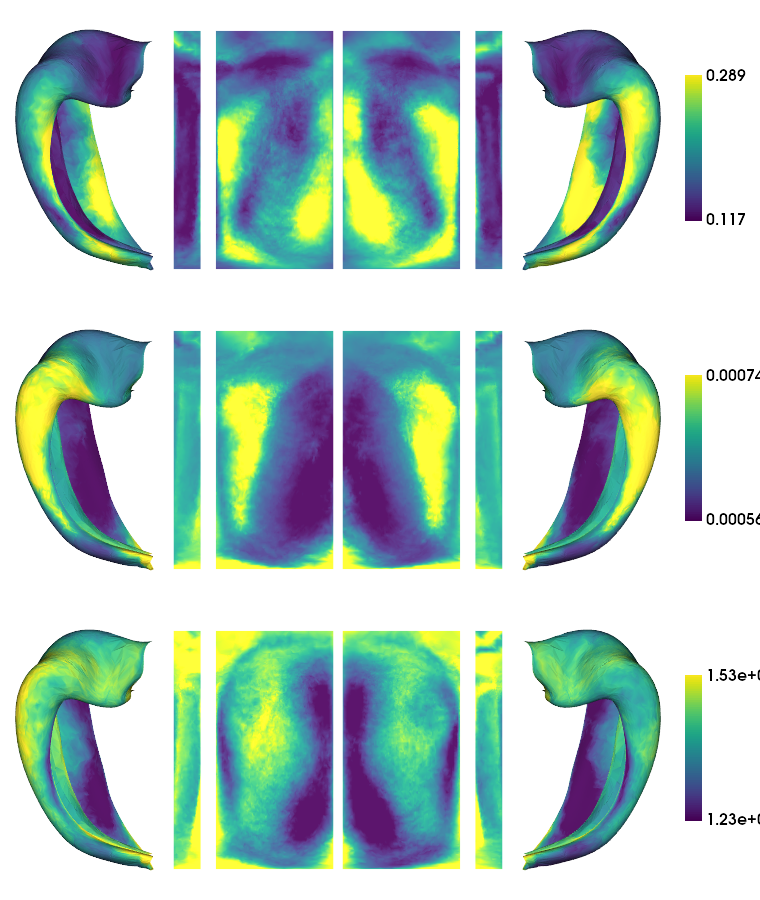

In [6]:
plotting.surfplot_canonical_foldunfold(np.nanmean(hipp_dat,axis=2), den='0p5mm', color_bar=('right'),unfoldAPrescale=True, share='row', tighten_cwindow=True, embed_nb=True)

In [7]:
# save 2D map
for h,hemi in enumerate(hemis):
    for l,label in enumerate(labels): 
        for f,feature in enumerate(features):
            cdat = np.nanmean(hipp_dat[ind[l],h,:,f],axis=1).flatten()
            data_array = nib.gifti.GiftiDataArray(data=cdat)
            image = nib.gifti.GiftiImage()
            image.add_gifti_data_array(data_array)
            nib.save(image, f'../maps/HippoMaps-initializationMaps/Dataset-MICs/MRI-3T-{feature}_average-{99-missingdat[f,0,0]}_hemi-{hemi}_den-0p5mm_label-{label}.shape.gii')